<a href="https://colab.research.google.com/github/dzervenes/dzervenes.github.io/blob/master/Unit_2_Seminar_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA**

In [ ]:
import pandas as pd

df = pd.read_csv('Unit02 auto-mpg.csv')
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


**Missing values**

In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64



The Auto-MPG dataset contains 398 entries and 9 columns, with no missing values. Most columns have appropriate data types, except for *horsepower*, which is categorized as *object* due to invalid entries. This column requires preprocessing to convert it into numeric form

In [ ]:
print(df['horsepower'].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


As predicted, there were invalid entries in horsepower column represented by "?", which must be addressed before further analysis

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


After converting *horsepower* to numeric format, it has been identified that there are 6 invalid outputs in this column.

In [ ]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


Invalid entries in the *horsepower* column have been replaced with the median value to ensure consistency and preserve the dataset's integrity

**Skewness and Kurtosis**

In [ ]:
from scipy.stats import skew, kurtosis

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    print(f"{col} - Skewness: {skew(df[col].dropna()):.2f}, Kurtosis: {kurtosis(df[col].dropna()):.2f}")

mpg - Skewness: 0.46, Kurtosis: -0.52
cylinders - Skewness: 0.52, Kurtosis: -1.37
displacement - Skewness: 0.72, Kurtosis: -0.75
horsepower - Skewness: 1.10, Kurtosis: 0.74
weight - Skewness: 0.53, Kurtosis: -0.79
acceleration - Skewness: 0.28, Kurtosis: 0.40
model year - Skewness: 0.01, Kurtosis: -1.18
origin - Skewness: 0.92, Kurtosis: -0.82


Skewness and Kurtosis Analysis

 * Skewness: Most features are mildly right-skewed, with *horsepower* (1.10) and *origin* (0.92) showing moderate positive skewness. *model year* (0.01) is nearly symmetric.


* Kurtosis: Most columns have light tails, except *horsepower* (0.74) and *acceleration* (0.40), which show slightly heavier tails.

Insights: Features like *horsepower* and *origin* may benefit from transformations to reduce skewness for modeling or analysis.

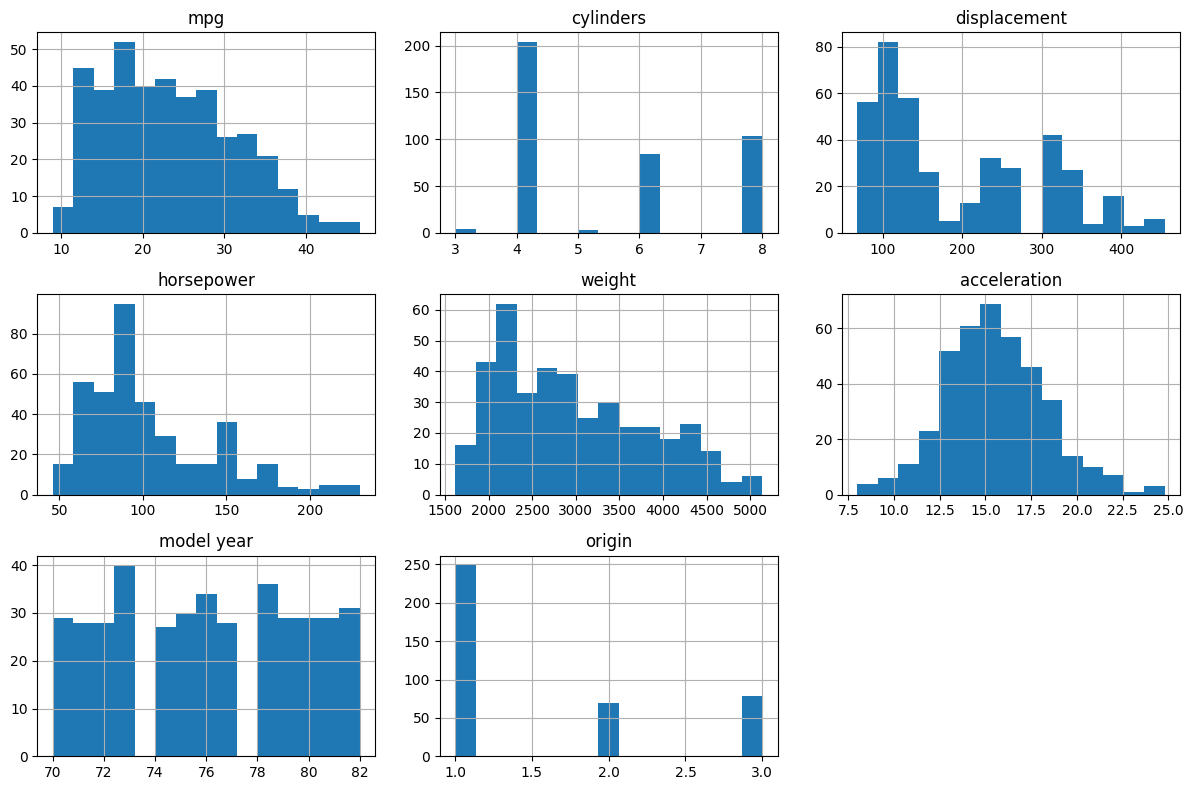

In [ ]:
df[numeric_cols].hist(figsize=(12, 8), bins=15)
plt.tight_layout()
plt.show()

**Data Distribution Summary**
* *mpg*: Right-skewed, with most cars between 15-30 mpg.
* *cylinders*: Discrete, dominated by 4 and 8 cylinders.
* *displacement*: Right-skewed, with smaller engines more common.
* *horsepower*: Right-skewed, concentrated on lower values.
* *weight*: Right-skewed, with most cars between 2000-3500 lbs.
* *acceleration*: Symmetric, peaking around 15 seconds.
* *model year*: Uniformly distributed across years.
* *origin*: Discrete, dominated by region 1.

**Correlation Heatmap**

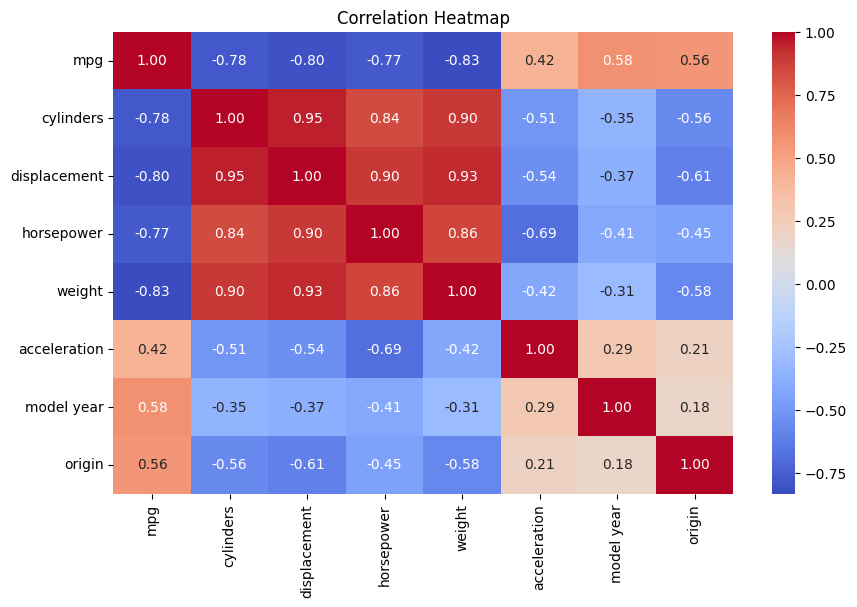

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Heatmap analysis**

*mpg*:

* Negatively correlated with *weight* (-0.83), *displacement* (-0.80), and *horsepower* (-0.77), indicating that heavier, larger, and more powerful cars have lower fuel efficiency.
* Positively correlated with *model year* (0.58) and *origin* (0.56), reflecting improved efficiency in newer cars and certain regions.

High correlation among *cylinders*, *displacement*, *horsepower*, and *weight* provides overlapping information. Cars with larger engines displacements often have more cylinders and higher horsepower, making them heavier. This underscores the importance of exercising caution when interpreting the model, as the significance of individual features can sometimes be misleading or distorted.

**Scatter plots**

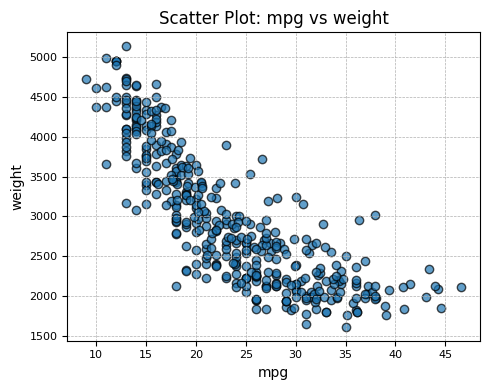

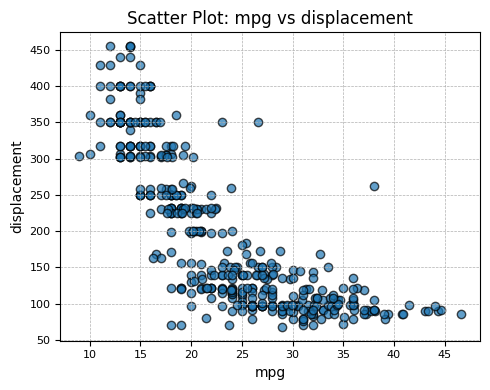

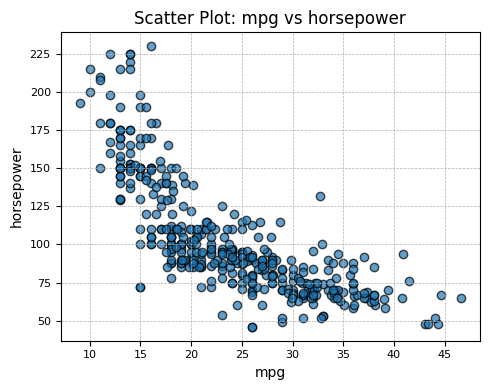

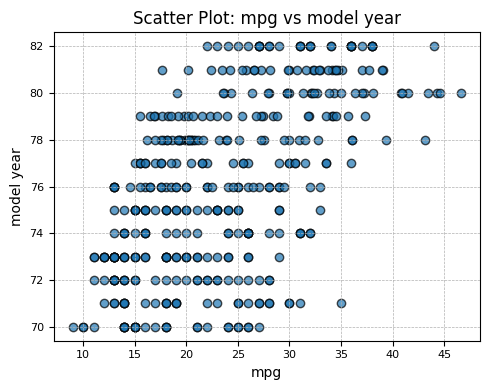

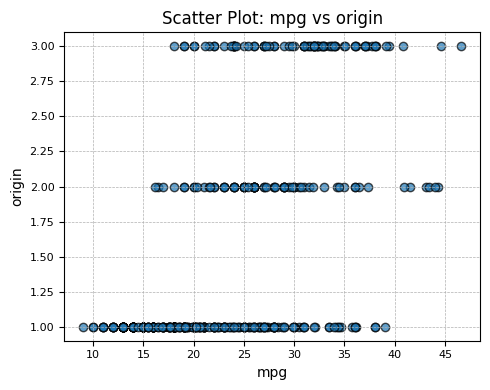

In [ ]:
# Pairs to visualize
pairs = [
    ('mpg', 'weight'),
    ('mpg', 'displacement'),
    ('mpg', 'horsepower'),
    ('mpg', 'model year'),
    ('mpg', 'origin'),
]


# Create scatter plots
for x, y in pairs:
    plt.figure(figsize=(5, 4))
    plt.scatter(df[x], df[y], alpha=0.7, edgecolor='k')
    plt.title(f'Scatter Plot: {x} vs {y}', fontsize=12)
    plt.xlabel(x, fontsize=10)
    plt.ylabel(y, fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

**Scatter Plot Insights**

*mpg* vs. *weight*, *displacement*, and *horsepower*:

* Strong negative relationships: Heavier cars, larger engines, and higher horsepower result in lower fuel efficiency.
mpg vs. model year:

* Positive trend: Newer cars are more fuel-efficient, reflecting technological advancements.
mpg vs. origin:

* Regional differences: Cars from region 3 are generally more fuel-efficient than those from region 1.


**Key Takeaway**:
Fuel efficiency improves with lighter, less powerful cars, newer models, and certain regions' designs.

In [ ]:
origin_mapping = {'America': 1, 'Europe': 2, 'Asia': 3}
df['origin'] = df['origin'].replace(origin_mapping)
print("Mapping used:", origin_mapping)

Mapping used: {'America': 1, 'Europe': 2, 'Asia': 3}
